# Analysis of portfolio performance measures

In this notebook, you will learn about the different portfolio performance measures and how to code the same. The following different measures are covered in this notebook:

1. Annualised Returns
2. Annualised Volatility
3. Sharpe Ratio
4. Sortino Ratio
5. Beta
6. Treynor Ratio
7. Information Ratio
8. Skewness
9. Kurtosis
10. Maximum Drawdown

You will learn to calculate these measures on the strategy returns of multi-factor portfolio covered in the previous section.

In [170]:
## Подключаем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import pandas as pd
import yfinance as yf
import matplotlib
from pandas_datareader import data as pdr
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
from pandas_datareader import data as web
import datetime
from nsepy import get_history
from nsepython import *
import logging
urllib3_logger = logging.getLogger('urllib3') # Обработчик сообщений, чтобы они не выводились при сборе данных о тикерах
urllib3_logger.setLevel(logging.CRITICAL)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import monthly_returns_heatmap as mrh
from tabulate import tabulate
import cvxpy as cp
import math
import seaborn as sns
# Need to import the matplotlib_converters from pandas,
# whenever you try to plot the columns of a dataframe using a for loop

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

## Import the Data

In [245]:
list_of_tickers = ['AMED', 'MOH', 'FL', 'CTLT', 'FE', 'CIEN', 'COP', 'DECK', 'UGI', 'CASY', 'THO', 'PWR', 'AAP', 'HLF', 'TSN', 'OLN', 'UAL', 'AZO', 'NEE', 'DG', 'FFIV', 'CSX', 'CSCO', 'BURL', 'FCN', 'BLL', 'ODFL', 'SSNC', 'GWW', 'UNH', 'MORN', 'HZNP', 'WWE', 'TDG']# ["BABA", "GOOGL", "FB", "INGR", "INTC", "JNJ", "LYB", "MSFT", "UNM", "VTRS", "AGRO.ME", "SBRCY", "IXC", "AAXJ", "EWZ", "ECH", "PICK", "EWS", "EZA", "EWU", "SCHH", "HYEM", "VGK", "VNQI"]
index = ['SPY']
start = datetime.datetime(2010,1,1)
end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
f = yf.download(list_of_tickers, start='2017-01-01', end='2017-12-30')
index_df = yf.download(index, start='2017-01-01', end='2017-12-30')

[*********************100%***********************]  34 of 34 completed
[*********************100%***********************]  1 of 1 completed


In [246]:
data_pc = f.pct_change()
data_pc = pd.DataFrame(data_pc["Adj Close"])
index_pc = index_df.pct_change()
index_pc = pd.DataFrame(index_pc["Adj Close"])
data_pc.head(5)

,AAP,AMED,AZO,BLL,BURL,CASY,CIEN,COP,CSCO,CSX,...,OLN,PWR,SSNC,TDG,THO,TSN,UAL,UGI,UNH,WWE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008207,0.045155,0.001996,0.015181,0.024770,-0.000925,0.012689,0.009287,-0.005944,0.020619,...,0.031947,0.005729,0.031174,0.006027,0.030752,0.014222,0.004263,0.009377,0.002849,0.037281
2017-01-05,-0.000698,-0.024302,-0.001311,-0.000520,0.002878,-0.008499,-0.017785,-0.002937,0.002325,0.009828,...,-0.014174,-0.006836,0.009406,-0.001270,-0.018152,0.005199,-0.028622,0.004104,0.001667,-0.015328
2017-01-06,-0.013090,-0.021910,0.001149,0.004423,-0.020429,-0.007638,-0.004115,-0.003731,0.001989,0.014328,...,-0.001513,0.000861,-0.004326,0.017400,0.004720,-0.007524,0.006203,0.008821,0.001418,-0.009125
2017-01-09,-0.000590,0.015798,-0.003241,-0.015803,0.001640,0.000941,0.001240,-0.021285,-0.001654,-0.014126,...,0.012884,-0.020344,0.013703,-0.003045,-0.010864,-0.010581,-0.001261,-0.030923,-0.002832,0.016251


In [247]:
index_pc.head(5)

,Adj Close
Date,
2017-01-03,NaN
2017-01-04,0.005950
2017-01-05,-0.000794
2017-01-06,0.003578
2017-01-09,-0.003301


In [248]:
portfolio = pd.DataFrame()
portfolio['portfolio_returns'] = data_pc.mean(axis=1)
portfolio['portfolio_cum_return'] = (portfolio['portfolio_returns']+1).cumprod()
portfolio['market_returns'] =  index_pc.mean(axis=1)
portfolio['market_cum_return'] = (portfolio['market_returns']+1).cumprod()
portfolio.head(5)

,portfolio_returns,portfolio_cum_return,market_returns,market_cum_return
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.014884,1.014884,0.005950,1.005950
2017-01-05,-0.007012,1.007768,-0.000794,1.005150
2017-01-06,-0.002144,1.005607,0.003578,1.008746
2017-01-09,-0.001805,1.003792,-0.003301,1.005417


## Annualised Returns

In [249]:
# The annual risk-free rate of 2% is assumed
risk_free_rate = 0.02

# Total number of trading days in a year is 252
trading_days = 252

# Calculate the average daily returns
average_daily_returns = portfolio['portfolio_returns'].mean()

# Calculate the annual returns by multiplying average daily returns with number of trading days
annual_returns = ((1 + average_daily_returns)**(trading_days) - 1)*100

'Среднегодовая доходность %.2f%%' % annual_returns

'Среднегодовая доходность 21.26%'

### Annualised Volatility
The volatility is the standard deviation of the returns of the portfolio. Annualised Volatility can be calculated by multiplying the daily volatility with the square root of number of trading days in a year.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/0EdOjUVz/PA1.PNG)

In [250]:
# Calculate the daily standard deviation
daily_std_dev = portfolio['portfolio_returns'].std()

# Calculate the annualised volatility
annual_volatility = daily_std_dev * np.sqrt(trading_days) * 100
'Средногодовая волатильность %.2f%%' % annual_volatility

'Средногодовая волатильность 9.86%'

### Sharpe Ratio
The Sharpe ratio is the excess return calculated as total returns less the risk-free rate of return per unit of volatility. Generally, risk-free return is the return on the risk-free assets such as government bonds. The excess returns are due to the 'extra risk' taken by the investor on investing in risky assets.

It tells whether the returns on a portfolio are due to good investment decision or the result of excessive risk taken. Higher Sharpe ratio is always preferable over the lower ones. 

The Sharpe Ratio can be used to compare the portfolio with the benchmark to get to know how your portfolio is repaying for the risk taken on the investment.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/ys4mgeBk/PA2.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_f $ = Risk-free Returns
<br>$ \sigma_p $ = Standard deviation of the portfolio returns

In [251]:
# Calculate the daily risk-free return by dividing the annual risk-free return by number of trading days
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns = portfolio['portfolio_returns'] - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
# It is multiplied by square root of trading days to get the annualized value
sharpe_ratio = (excess_daily_returns.mean() /
                excess_daily_returns.std()) * np.sqrt(trading_days)
'Коэффициент Шарпа %.2f' % sharpe_ratio

'Коэффициент Шарпа 1.75'

### Sortino Ratio
In the Sortino ratio, the denominator of the Sharpe ratio, the total standard deviation is replaced with the downside deviation. The downside deviation is the standard deviation of negative asset return.

It differentiates the harmful volatility from the total volatility by using the standard deviation of negative returns only. Since an investor is concerned only about the downside volatility, Sortino ratio is a good measure in comparing the highly volatile portfolios whereas the Sharpe ratio is better at analyzing portfolios with low volatility. The probability of large loss will be low if the value of the Sortino ratio is high.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/bAlslhZL/PA3.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_f $ = Risk-free Returns
<br>$ \sigma_d $ = Standard deviation of the negative asset returns

In [252]:
# Define a variable net_returns to calculate daily returns subtracted by average daily returns
net_returns = portfolio['portfolio_returns'] - average_daily_returns

# Define a variable negative_returns to keep only negative net_returns
negative_returns = net_returns[net_returns < 0]

# Calculate the standard deviation of negative returns by defining semi_dev variable
semi_dev = np.sqrt(np.sum((negative_returns**2))/len(returns))

# Calculate the Sortino ratio using the above-mentioned formula
# It is multiplied by the square root of trading days to get the annualized value
sortino_ratio = (excess_daily_returns.mean()/semi_dev) * np.sqrt(trading_days)
'Коэффициент Сортино %.2f' % sortino_ratio

NameError: name 'returns' is not defined

### Beta
The beta is used to capture the relationship between the portfolio returns and the market returns.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/YoH8EJ8W/PA4.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_m $ = Market Returns

In [ ]:
# Calculate the covariance between market returns and portfolio returns
covariance_matrix = portfolio[['market_returns', 'portfolio_returns']].cov()
covariance_value = covariance_matrix.iloc[0]['portfolio_returns']

# Calculate the market variance
market_variance = portfolio['market_returns'].var()

# Calculate the beta value using the given formula
beta = covariance_value/market_variance
'Beta = %.2f' % beta

### Treynor Ratio
Treynor Ratio is the variation in the denominator of the Sharpe ratio by replacing the total standard deviation with the beta of the portfolio. It also highlights the risk-adjusted performance of the portfolio. Higher the Treynor ratio, more suitable the investment is. The ratio is based on historical returns data, it is not necessary it will replicate in the future. The higher ratio tells that investment is good but it does not quantify how much good the investment is.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/Ds106Ffi/PA5.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_f $ = Risk-free Returns
<br>$ \beta_p $ = Portfolio's Beta

In [ ]:
# Calculate the Treynor ratio using the above formula
# It is multiplied by trading days to get the annualized value
treynor_ratio = (excess_daily_returns.mean()*trading_days)/beta
'Коэффициент Трейнора %.2f' % treynor_ratio

### Information Ratio
Information ratio tells the portfolio's return in excess of the benchmark's return with respect to the volatility of these returns.  It tells an investor how much excess return is generated from the excess risk taken with respect to its benchmark. A Higher ratio implies that the fund is more consistent and better performing. The range between 0.4-0.6 is considered good and the value greater than 1 is considered excellent but is found quite rare.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/itfI2JQC/PA6.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_m $ = Market Returns
<br>$ \sigma_{p,m} $ = Standard deviation of the difference between portfolio and market returns

In [ ]:
# Calculate the Treynor Ratio using the above formula
# It is multiplied by square root of trading days to get the annualized value
information_ratio = ((average_daily_returns - portfolio['market_returns'].mean()) /
                     (portfolio['portfolio_returns'] - portfolio['market_returns']).std()) * np.sqrt(trading_days)
'The information raio is %.2f' % information_ratio

### Skewness
Skewness is the degree of distortion from the normal distribution. It can be either positive or negative. Positive skew means that the right tail is longer than the left tail and vice-versa for the negative kurtosis. It is important to determine the kurtosis as it better judges the likelihood of events falling in the tail of the distribution rather than focusing only on the average. A positively skewed investment in the portfolio indicates frequent small losses and few large gains while a negatively skewed investment implies frequent small gains and few large losses.

In [ ]:
# Calculate the skewness using the skew() function
skewness = portfolio['portfolio_returns'].skew()
'The skewness is %.2f' % skewness

### Kurtosis
Kurtosis, like skewness, is a measure of distribution. It explains how the tails of a given distribution differ from the tails of the normal distribution. It tells whether the tails of the distribution contain extreme values or not. Kurtosis tells about the heaviness in the tails while skewness tells about the symmetry.

Kurtosis can be mesokurtic, leptokurtic and platykurtic. Mesokurtic show the same extreme value characteristics as the normal distribution. Leptokurtic has positive excess distribution. This distribution has long tails and is more concentrated at the mean. Investment in this type of distribution is risky. The Platykurtic distribution shows negative excess distribution. Investment in this type of distribution is considered less risky.

In [253]:
# Calculate the excess kurtosis using the kurtosis() function
excess_kurtosis = portfolio['portfolio_returns'].kurtosis()
'The kurtosis is %.2f' % excess_kurtosis

'The kurtosis is 0.10'

### Maximum Drawdown
Maximum Drawdown is a key measure to assess the risk possess by a given portfolio. It measures the peak-to-trough decline in the value of the portfolio and is quoted as the percentage of the peak value. The formula to calculate the Maximum Drawdown is:

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/Mn5OxlcB/PA7.PNG)

where,

$ P $ = Maximum value before the largest drop
<br>$ L $ = Lowest value before the new high

Maximum Drawdown only measures the size of the largest loss but it doesn't say how frequently the losses are occurring and how much time it took to recover from those losses. A low value of maximum drawdown is preferred as it indicates that losses from the investment in the portfolio are less. 

In [254]:
# Cumulative product of portfolio returns
cumprod_ret = (portfolio['portfolio_returns'].dropna()+1).cumprod()*100

# Cumulative product of market returns
cumprod_market_ret = (portfolio['market_returns'].dropna()+1).cumprod()*100

# Convert the index in datetime format
cumprod_ret.index = pd.to_datetime(cumprod_ret.index)

# Define a variable trough_index to store the index of lowest value before new high
trough_index = (np.maximum.accumulate(cumprod_ret) - cumprod_ret).idxmax()

# Define a variable peak_index to store the index of maximum value before largest drop
peak_index = cumprod_ret.loc[:trough_index].idxmax()

# Calculate the maximum drawdown using the given formula
maximum_drawdown = 100 * \
    (cumprod_ret[trough_index] - cumprod_ret[peak_index]) / \
    cumprod_ret[peak_index]
'The maximum drawdown is %.2f%%' % maximum_drawdown

'The maximum drawdown is -5.51%'

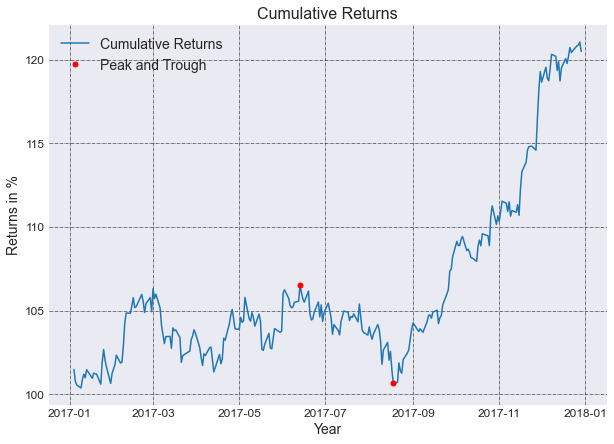

In [255]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the cumulative product of returns
plt.plot(cumprod_ret)

# Plot to represent the peak and trough, represented by red dots.
plt.plot([peak_index, trough_index], [cumprod_ret[peak_index], cumprod_ret[trough_index]], 'o', color='r',
         markersize=5)

# Define the label for the title of the figure
plt.title("Cumulative Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Define the label for the legend
plt.legend(["Cumulative Returns", "Peak and Trough"], fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

logging.getLogger('matplotlib.font_manager').disabled = True

### Plot the running maximum drawdown

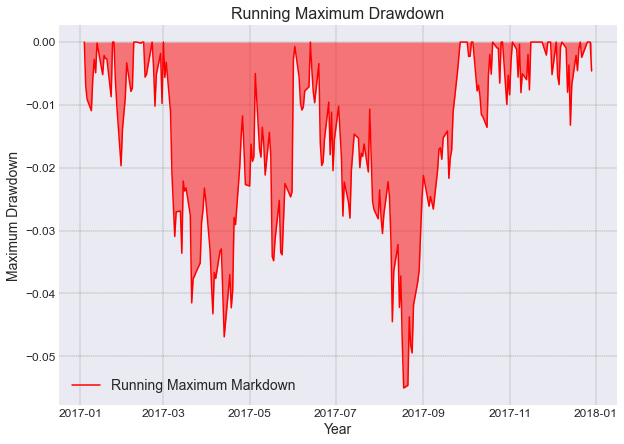

In [256]:
# Calculate the running maximum value for the cumulative returns
running_max = np.maximum.accumulate(cumprod_ret)

# Set value of the running_max to 1 if it is less than 1
running_max[running_max < 1] = 1

# Calculate the running maximum drawdown
running_max_drawdown = (cumprod_ret/running_max)-1

# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the running maximum drawdown
plt.plot(running_max_drawdown, color='r')

# Define the label for the title of the figure
plt.title("Running Maximum Drawdown", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel('Year', fontsize=14)
plt.ylabel('Maximum Drawdown', fontsize=14)

# Define the label for the legend
plt.legend(["Running Maximum Markdown"], fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)

# Fill the space between the plot
plt.fill_between(running_max_drawdown.index,
                 running_max_drawdown, alpha=0.5, color='r', linewidth=0)

plt.show()

### Plot the histogram of returns of the portfolio

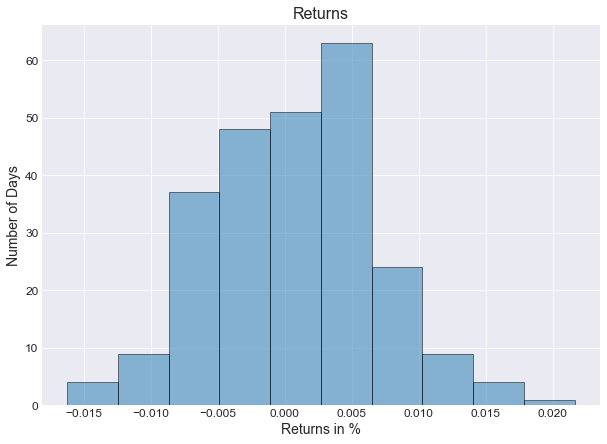

In [257]:
# Drop the NULL values for the histogram plot
portfolio.dropna(inplace=True)

# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the histogram of returns of the portfolio
plt.hist(portfolio['portfolio_returns'], histtype='bar', alpha=0.5, ec='black')

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel("Returns in %", fontsize=14)
plt.ylabel("Number of Days", fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot the heatmap of monthly returns of the portfolio vs year

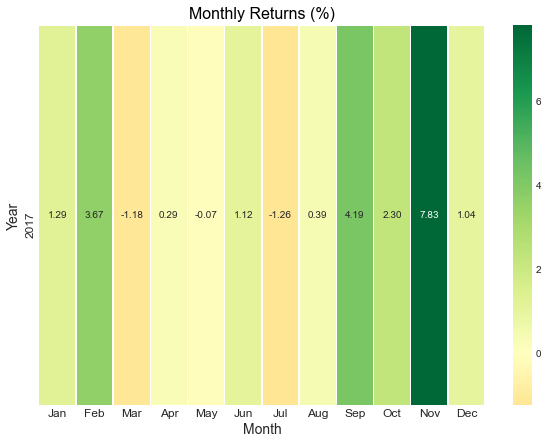

In [258]:
# Average monthly returns of the portfolio
portfolio_monthly_mean = portfolio.resample('M').mean()

# Total count of each month
portfolio_monthly_count = portfolio.resample('M').count()

# Calculation of monthly returns of the portfolio
portfolio_monthly_ret = (portfolio_monthly_mean +
                         1)**(portfolio_monthly_count) - 1

# Heatmap of monthly returns of portfolio vs year
mrh.plot(portfolio_monthly_ret['portfolio_returns'], figsize=(10, 7))

# Define the label for the title of the figure
plt.title('Monthly Returns (%)', fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot the cumulative returns of the portfolio vs Index

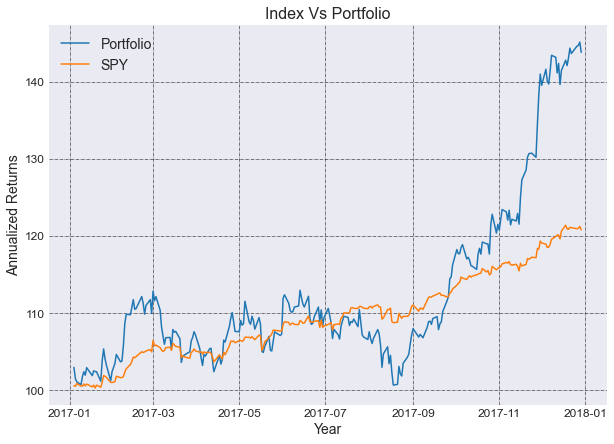

In [259]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Here we have multiplied returns by a factor of 2 as we can take the leverage of 2.
cumprod_ret_leverage_2 = (portfolio['portfolio_returns']*2+1).cumprod()*100

# Plot the cumulative product of portfolio returns
plt.plot(cumprod_ret_leverage_2, label='Portfolio')

# Plot the cumulative product of market(S&P500) returns
plt.plot(cumprod_market_ret, label='SPY')

# Define the label for the title of the figure
plt.title("Index Vs Portfolio", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel("Year", fontsize=14)
plt.ylabel("Annualized Returns", fontsize=14)

# Define the label for the legend
plt.legend(["Portfolio", "SPY"], fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

### Все расчетные параметры

In [260]:
# Form a table to get the values of all risk measures in structured manner
table = pd.DataFrame({'Параметры': ['Annual Returns', 'Annual Volatility', 'Sharpe Ratio', 'Sortino Ratio',
                                     'Beta', 'Treynor Ratio', 'Information Ratio', 'Skewness', 'Kurtosis',
                                     'Maximum Drawdown'],
                      'Значения': [annual_returns, annual_volatility, sharpe_ratio, sortino_ratio, beta,
                                treynor_ratio, information_ratio, skewness, excess_kurtosis, maximum_drawdown]})

print(tabulate(table, headers='keys', tablefmt='psql'))

NameError: name 'sortino_ratio' is not defined

# Portfolio Strategy based on Kelly Criterion

In this notebook, you will learn how to create a Kelly portfolio. 
The process for doing that is as follows:
1. Import the libraries and data 
2. Calculate the daily returns
3. Create the Kelly criterion
4. Create the Kelly portfolio

## Calculate the daily returns
While optimizing the Kelly Criterion, you multiply the daily returns of the stocks with their corresponding weights to get the returns of the portfolio. For the first step towards calculating the Kelly criterion, you will create a dataframe that will contain the daily percentage change of each of the stocks.

In [261]:
data_pc.head()

,AAP,AMED,AZO,BLL,BURL,CASY,CIEN,COP,CSCO,CSX,...,OLN,PWR,SSNC,TDG,THO,TSN,UAL,UGI,UNH,WWE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008207,0.045155,0.001996,0.015181,0.024770,-0.000925,0.012689,0.009287,-0.005944,0.020619,...,0.031947,0.005729,0.031174,0.006027,0.030752,0.014222,0.004263,0.009377,0.002849,0.037281
2017-01-05,-0.000698,-0.024302,-0.001311,-0.000520,0.002878,-0.008499,-0.017785,-0.002937,0.002325,0.009828,...,-0.014174,-0.006836,0.009406,-0.001270,-0.018152,0.005199,-0.028622,0.004104,0.001667,-0.015328
2017-01-06,-0.013090,-0.021910,0.001149,0.004423,-0.020429,-0.007638,-0.004115,-0.003731,0.001989,0.014328,...,-0.001513,0.000861,-0.004326,0.017400,0.004720,-0.007524,0.006203,0.008821,0.001418,-0.009125
2017-01-09,-0.000590,0.015798,-0.003241,-0.015803,0.001640,0.000941,0.001240,-0.021285,-0.001654,-0.014126,...,0.012884,-0.020344,0.013703,-0.003045,-0.010864,-0.010581,-0.001261,-0.030923,-0.002832,0.016251


In [262]:
# Drop the first row containing the null values
data_pc.dropna(inplace=True)

# Calculate the cumulative percentage returns of each stock
data_cumulative_returns = (data_pc+1).cumprod()*100

In [263]:
# Print the top 5 rows of the dataframe
data_cumulative_returns.head()

,AAP,AMED,AZO,BLL,BURL,CASY,CIEN,COP,CSCO,CSX,...,OLN,PWR,SSNC,TDG,THO,TSN,UAL,UGI,UNH,WWE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,100.820660,104.515518,100.199626,101.518115,102.476998,99.907510,101.268929,100.928711,99.405556,102.061864,...,103.194748,100.572908,103.117414,100.602698,103.075230,101.422184,100.426348,100.937653,100.284940,103.728077
2017-01-05,100.750313,101.975541,100.068226,101.465345,102.771878,99.058437,99.467863,100.632307,99.636718,103.064933,...,101.732088,99.885387,104.087289,100.474971,101.204214,101.949510,97.551920,101.351938,100.452151,102.138138
2017-01-06,99.431448,99.741297,100.183200,101.914169,100.672328,98.301813,99.058536,100.256878,99.834854,104.541657,...,101.578138,99.971361,103.636977,102.223194,101.681942,101.182489,98.157067,102.245969,100.594606,101.206152
2017-01-09,99.372831,101.317030,99.858490,100.303625,100.837461,98.394296,99.181331,98.122906,99.669744,103.064933,...,102.886830,97.937560,105.057135,101.911880,100.577224,100.111838,98.033282,99.084187,100.309697,102.850869
2017-01-10,99.601414,101.458135,100.280491,99.828379,103.078557,98.789401,98.649202,98.122906,100.330248,104.263035,...,106.505017,99.026053,106.269481,101.089657,101.373410,97.810795,101.306567,98.800711,100.080548,104.057009


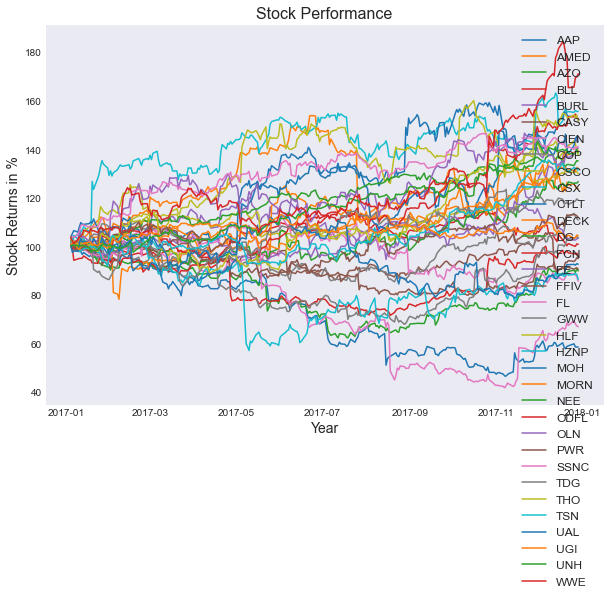

In [264]:
# Plot the returns of both the stocks
plt.figure(figsize=(10, 7))
for column in data_pc.columns.values:
    plt.plot(data_pc.index, data_cumulative_returns[column], label=column)

plt.legend(loc='best', fontsize=12)
plt.title('Stock Performance', fontsize=16)
plt.ylabel('Stock Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid()
plt.show()

## Create the Kelly Criterion

Each stock in the portfolio has a certain percentage weight of the capital allocated to it. So, while optimizing the weights of each stock in the portfolio, you need to create an array of weights that has the same number of weight variables as the number of stocks. You can get the number of the stocks in the portfolio using the below command.

In [265]:
# Save the number of stocks in a variable
no_of_stocks = data_pc.shape[1]
no_of_stocks

34

You can use the cvxpy library to create an array containing weight variables. You need to specify the number of stocks as the input for this function.

In [266]:
weights = cp.Variable(no_of_stocks)
weights.shape

(34,)

While calculating the portfolio returns of a day, you need to multiply the stock returns with the corresponding weight allocation, as shown below.

In [267]:
# Save the portfolio returns in a variable
portfolio_returns = (np.array(data_pc) @ weights)
portfolio_returns

Expression(AFFINE, UNKNOWN, (250,))

In [268]:
(np.array(data_pc) @ weights)

Expression(AFFINE, UNKNOWN, (250,))

The final portfolio value or the utility of the portfolio can be computed using the logarithmic summation of the daily portfolio returns.

In [269]:
final_portfolio_value = cp.sum(cp.log(1+portfolio_returns))
final_portfolio_value

Expression(CONCAVE, UNKNOWN, ())

The output tells us that the final_portfolio_value is an expression and is concave in nature and its value is unknown

The objective of this exercise is to maximise the Kelly criterion. To do this, you can create a parameter called 'objective' and assign the maximisation condition to it. The Maximize function of the cvxpy library is used for this purpose.

In [270]:
objective = cp.Maximize(final_portfolio_value)
objective

Maximize(Expression(CONCAVE, UNKNOWN, ()))

The output tells us that the objective is a Maximize function over an expression and the expression is concave in nature and its value is unknown

Before you solve the objective, you need to remember that there are certain constraints on the weights of the portfolio.

1. The weights should positive, as you are considering only a long-only scenario.
2. The sum of weights should be less than or equal to 1, as you are not considering leveraging.

In [271]:
constraints = [0.0 <= weights, cp.sum(weights) == 1]
constraints

[Inequality(Constant(CONSTANT, ZERO, ())),
 Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ()))]

Here the constraints specify that the first one is an inequality constraint and its value is a constant zero. While the second is an equality constraint between an affine expression whose value is equal to a constant non-negative value

Now, you can combine both the objective and the constraints to create a problem statement. You can do this by using the Problem class of the cvxpy library, as shown below.

In [272]:
problem = cp.Problem(objective, constraints)
problem

Problem(Maximize(Expression(CONCAVE, UNKNOWN, ())), [Inequality(Constant(CONSTANT, ZERO, ())), Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ()))])

Here the output describes the entire problem including all the previously described expression into a one single statement

You can use the solve method of the problem class to get the best weight combination as shown below

In [273]:
# The optimal objective value is returned by `prob.solve()`.
problem.solve()

# The optimal value for w is stored in `w.value`.
print(weights.value)

[2.81176718e-12 4.90774814e-11 1.23782230e-11 1.69821646e-11
 1.19027345e-10 1.41877310e-11 1.08437510e-11 2.47287160e-11
 4.83497430e-11 1.97391729e-09 2.68023175e-10 1.09692185e-10
 4.51409360e-11 1.45065763e-11 1.88944765e-11 1.18866884e-11
 6.08295502e-12 1.95500026e-11 8.13926499e-11 1.56169560e-11
 1.84924062e-10 5.11681769e-11 6.16112056e-11 1.63650515e-10
 9.33413418e-11 2.51977227e-11 8.86123063e-11 3.37799770e-11
 2.26335187e-10 5.36049199e-11 1.37437976e-11 1.89259666e-11
 7.09237157e-11 9.99999996e-01]


In [274]:
df1 = pd.DataFrame()
df1['weights']=weights.value
df1['tickers']=list_of_tickers

In [282]:
print(df1['weights'])

0     2.811767e-12
1     4.907748e-11
2     1.237822e-11
3     1.698216e-11
4     1.190273e-10
5     1.418773e-11
6     1.084375e-11
7     2.472872e-11
8     4.834974e-11
9     1.973917e-09
10    2.680232e-10
11    1.096922e-10
12    4.514094e-11
13    1.450658e-11
14    1.889448e-11
15    1.188669e-11
16    6.082955e-12
17    1.955000e-11
18    8.139265e-11
19    1.561696e-11
20    1.849241e-10
21    5.116818e-11
22    6.161121e-11
23    1.636505e-10
24    9.334134e-11
25    2.519772e-11
26    8.861231e-11
27    3.377998e-11
28    2.263352e-10
29    5.360492e-11
30    1.374380e-11
31    1.892597e-11
32    7.092372e-11
33    1.000000e+00
Name: weights, dtype: float64


In [275]:
df1

,weights,tickers
0,2.811767e-12,AMED
1,4.907748e-11,MOH
2,1.237822e-11,FL
3,1.698216e-11,CTLT
4,1.190273e-10,FE
5,1.418773e-11,CIEN
6,1.084375e-11,COP
7,2.472872e-11,DECK
8,4.834974e-11,UGI
9,1.973917e-09,CASY


## Create Kelly portfolio
These weights were generated using the stock return data. Now you should create the Kelly portfolio by allocating these weights to the corresponding stocks and measure the performance of the portfolio.

You can get the daily portfolio returns on the data by multiplying the weight values with stock returns as shown.

In [276]:
kelly_portfolio_returns = ((data_pc)*(weights.value)).sum(axis=1)
kelly_portfolio_returns.head()

Date
2017-01-04    0.037281
2017-01-05   -0.015328
2017-01-06   -0.009125
2017-01-09    0.016251
2017-01-10    0.011727
dtype: float64

You can get the daily portfolio value buy adding 1 to the daily returns and then taking a cumulative product of the daily returns.

In [277]:
kelly_portfolio_value = (1+(kelly_portfolio_returns)).cumprod()
kelly_portfolio_value.head()

Date
2017-01-04    1.037281
2017-01-05    1.021381
2017-01-06    1.012062
2017-01-09    1.028509
2017-01-10    1.040570
dtype: float64

You can calculate the annualised returns of the Kelly portfolio using the below formula.

In [278]:
kelly_annualized_returns = (
    (kelly_portfolio_value[-1])**(252/len(data_pc)))-1

# Print the annualized returns of the Kelly portfolio
kelly_annualized_returns

0.719427652363062

Now, you can compare the performance of the Kelly portfolio with that of the equal weight portfolio. To do this, you need to create an equal weight portfolio by giving 50% to each of the stocks or by simply taking the average of their returns.

In [279]:
equal_weight_portfolio = (1+((data_pc).mean(axis=1))).cumprod()
equal_weight_portfolio.head()

Date
2017-01-04    1.014884
2017-01-05    1.007768
2017-01-06    1.005607
2017-01-09    1.003792
2017-01-10    1.008964
dtype: float64

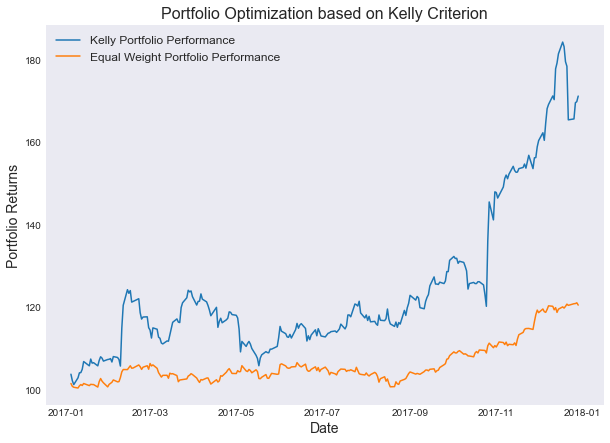

In [280]:
# Plot the percentage returns of Kelly and Equal Weight portfolios
plt.figure(figsize=(10, 7))
plt.plot(kelly_portfolio_value*100, label='Kelly Portfolio Performance')
plt.plot(equal_weight_portfolio*100,
         label='Equal Weight Portfolio Performance')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.title('Portfolio Optimization based on Kelly Criterion', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.show()

### Корреляция и веса в портфеле

In [283]:
import yfinance as yf

list_of_tickers = ['AMED', 'MOH', 'FL', 'CTLT', 'FE', 'CIEN', 'COP', 'DECK', 'UGI', 'CASY', 'THO', 'PWR', 'AAP', 'HLF', 'TSN', 'OLN', 'UAL', 'AZO', 'NEE', 'DG', 'FFIV', 'CSX', 'CSCO', 'BURL', 'FCN', 'BLL', 'ODFL', 'SSNC', 'GWW', 'UNH', 'MORN', 'HZNP', 'WWE', 'TDG']
# ["SBER.ME", "YNDX.ME", "AGRO.ME", "GAZP.ME", "GMKN.ME"]
# ["VTBR.ME", "MLRYY", "AGRO.ME", "NVTK.ME", "PLZL.ME"]
index = ['SPY']
start = datetime.datetime(2020,1,1)
end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
f = yf.download(list_of_tickers, start="2017-01-01", end="2017-12-31")
index_df = yf.download(index, start="2017-01-01", end="2017-12-31")

[*********************100%***********************]  34 of 34 completed
[*********************100%***********************]  1 of 1 completed


In [284]:
data_pc = f.pct_change()
data_pc = pd.DataFrame(data_pc["Adj Close"])
index_pc = index_df.pct_change()
index_pc = pd.DataFrame(index_pc["Adj Close"])
data_pc.head(5)

,AAP,AMED,AZO,BLL,BURL,CASY,CIEN,COP,CSCO,CSX,...,OLN,PWR,SSNC,TDG,THO,TSN,UAL,UGI,UNH,WWE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008206,0.045155,0.001996,0.015182,0.024770,-0.000925,0.012689,0.009287,-0.005945,0.020618,...,0.031948,0.005729,0.031174,0.006027,0.030752,0.014222,0.004263,0.009376,0.002850,0.037281
2017-01-05,-0.000697,-0.024302,-0.001311,-0.000520,0.002878,-0.008499,-0.017785,-0.002936,0.002326,0.009828,...,-0.014174,-0.006835,0.009405,-0.001270,-0.018152,0.005199,-0.028622,0.004105,0.001667,-0.015328
2017-01-06,-0.013091,-0.021910,0.001149,0.004423,-0.020429,-0.007638,-0.004115,-0.003731,0.001989,0.014328,...,-0.001513,0.000860,-0.004326,0.017400,0.004720,-0.007523,0.006203,0.008821,0.001418,-0.009125
2017-01-09,-0.000589,0.015798,-0.003241,-0.015803,0.001640,0.000941,0.001240,-0.021285,-0.001654,-0.014126,...,0.012883,-0.020344,0.013703,-0.003046,-0.010864,-0.010581,-0.001261,-0.030923,-0.002833,0.016251


In [285]:
cov_matrix = data_pc.cov()
cov_matrix

,AAP,AMED,AZO,BLL,BURL,CASY,CIEN,COP,CSCO,CSX,...,OLN,PWR,SSNC,TDG,THO,TSN,UAL,UGI,UNH,WWE
AAP,0.000618,0.000040,0.000234,0.000015,0.000121,4.888147e-05,0.000034,0.000044,-0.000002,-0.000013,...,-0.000033,0.000039,-2.580927e-05,0.000005,0.000065,0.000040,0.000030,0.000028,0.000010,0.000016
AMED,0.000040,0.000540,0.000033,0.000033,0.000035,3.623904e-05,0.000021,0.000043,0.000022,0.000051,...,0.000045,0.000024,6.191135e-05,0.000044,0.000046,0.000023,0.000049,0.000019,0.000029,0.000049
AZO,0.000234,0.000033,0.000281,0.000010,0.000079,6.463456e-05,0.000012,0.000035,0.000013,0.000008,...,0.000002,0.000033,-1.159562e-05,-0.000009,0.000061,0.000042,0.000035,0.000005,0.000007,0.000003
BLL,0.000015,0.000033,0.000010,0.000102,0.000013,2.144562e-05,0.000043,0.000003,0.000021,0.000004,...,0.000034,0.000022,2.979391e-05,0.000038,0.000022,0.000026,0.000033,0.000027,0.000013,0.000007
BURL,0.000121,0.000035,0.000079,0.000013,0.000299,5.794900e-05,0.000029,0.000022,0.000026,0.000014,...,0.000039,0.000049,1.385421e-05,-0.000004,0.000069,0.000026,0.000051,0.000012,0.000008,0.000069
CASY,0.000049,0.000036,0.000065,0.000021,0.000058,1.858825e-04,0.000013,0.000014,0.000016,-0.000006,...,0.000025,0.000032,1.979342e-07,0.000022,0.000012,0.000010,0.000014,0.000016,0.000002,0.000016
CIEN,0.000034,0.000021,0.000012,0.000043,0.000029,1.302227e-05,0.000433,0.000048,0.000070,0.000045,...,0.000093,0.000075,6.055110e-05,0.000044,0.000086,0.000027,0.000062,0.000025,0.000026,0.000037
COP,0.000044,0.000043,0.000035,0.000003,0.000022,1.372723e-05,0.000048,0.000218,0.000011,0.000013,...,0.000063,0.000055,-1.119611e-05,0.000017,0.000062,0.000012,0.000012,0.000020,0.000016,0.000038
CSCO,-0.000002,0.000022,0.000013,0.000021,0.000026,1.596861e-05,0.000070,0.000011,0.000098,0.000024,...,0.000044,0.000037,3.364565e-05,0.000028,0.000039,0.000018,0.000036,0.000011,0.000009,0.000020
CSX,-0.000013,0.000051,0.000008,0.000004,0.000014,-6.428722e-06,0.000045,0.000013,0.000024,0.000449,...,0.000010,0.000060,3.890336e-05,0.000049,0.000054,0.000006,0.000074,-0.000011,0.000041,0.000009


In [286]:
corr_matrix = data_pc.corr()
corr_matrix

,AAP,AMED,AZO,BLL,BURL,CASY,CIEN,COP,CSCO,CSX,...,OLN,PWR,SSNC,TDG,THO,TSN,UAL,UGI,UNH,WWE
AAP,1.000000,0.069955,0.562104,0.061075,0.282177,0.144222,0.065290,0.120896,-0.009469,-0.024904,...,-0.069415,0.111629,-0.092564,0.013322,0.142384,0.131414,0.064484,0.122947,0.043682,0.035452
AMED,0.069955,1.000000,0.085565,0.139849,0.087801,0.114409,0.044385,0.126013,0.094743,0.103534,...,0.101978,0.075060,0.237594,0.120712,0.108876,0.079527,0.112611,0.089619,0.139042,0.117345
AZO,0.562104,0.085565,1.000000,0.057257,0.273352,0.282809,0.034515,0.139565,0.081427,0.022328,...,0.006955,0.139621,-0.061674,-0.035535,0.197181,0.203706,0.112302,0.033462,0.044567,0.011374
BLL,0.061075,0.139849,0.057257,1.000000,0.075437,0.155673,0.204539,0.019156,0.208463,0.021005,...,0.176072,0.155081,0.262896,0.241420,0.119632,0.208576,0.174319,0.296647,0.141782,0.038286
BURL,0.282177,0.087801,0.273352,0.075437,1.000000,0.245931,0.079233,0.084321,0.149342,0.037259,...,0.119535,0.200831,0.071471,-0.013129,0.218000,0.123952,0.159153,0.078458,0.051766,0.223554
CASY,0.144222,0.114409,0.282809,0.155673,0.245931,1.000000,0.045879,0.068225,0.118440,-0.022248,...,0.095202,0.169075,0.001294,0.102265,0.046196,0.060798,0.053082,0.129194,0.012367,0.065066
CIEN,0.065290,0.044385,0.034515,0.204539,0.079233,0.045879,1.000000,0.155377,0.341521,0.101165,...,0.233283,0.256662,0.259318,0.135291,0.224005,0.104923,0.159470,0.133104,0.138953,0.100116
COP,0.120896,0.126013,0.139565,0.019156,0.084321,0.068225,0.155377,1.000000,0.072406,0.040172,...,0.224692,0.264763,-0.067641,0.071829,0.226872,0.066975,0.042955,0.145849,0.117612,0.144598
CSCO,-0.009469,0.094743,0.081427,0.208463,0.149342,0.118440,0.341521,0.072406,1.000000,0.114893,...,0.232361,0.269944,0.303349,0.181517,0.217101,0.144167,0.195145,0.126002,0.106604,0.114832
CSX,-0.024904,0.103534,0.022328,0.021005,0.037259,-0.022248,0.101165,0.040172,0.114893,1.000000,...,0.024672,0.200277,0.163654,0.148219,0.139738,0.021883,0.187686,-0.058055,0.214336,0.023225


<AxesSubplot:>

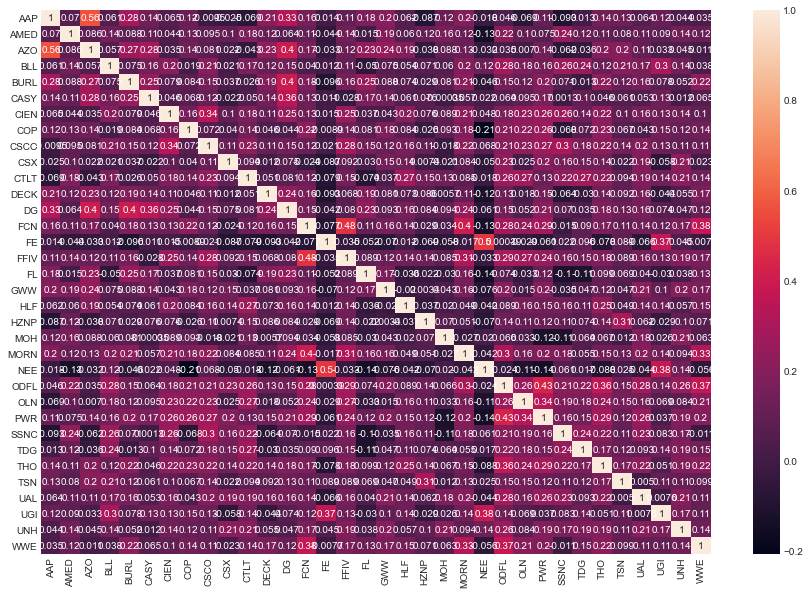

In [287]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_pc.corr(), annot=True)

### Расчет максимально и минимально рискованного портфеля

In [288]:
stock_prices = pd.DataFrame(f["Adj Close"])
stock_prices.dropna(inplace=True)
stock_prices

,AAP,AMED,AZO,BLL,BURL,CASY,CIEN,COP,CSCO,CSX,...,OLN,PWR,SSNC,TDG,THO,TSN,UAL,UGI,UNH,WWE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,166.497498,42.520000,791.460022,36.368542,84.779999,114.082420,24.430000,44.347244,26.138748,11.219687,...,22.017199,34.484940,27.856798,205.932404,91.847588,56.723545,72.709999,40.296577,150.204895,17.291439
2017-01-04,167.863785,44.439999,793.039978,36.920673,86.879997,113.976913,24.740000,44.759083,25.983364,11.451019,...,22.720596,34.682499,28.725214,207.173553,94.672112,57.530258,73.019997,40.674412,150.632904,17.936073
2017-01-05,167.746704,43.360001,792.000000,36.901478,87.129997,113.008232,24.299999,44.627663,26.043793,11.563560,...,22.398556,34.445427,28.995388,206.910538,92.953613,57.829365,70.930000,40.841366,150.884064,17.661158
2017-01-06,165.550766,42.410000,792.909973,37.064701,85.349998,112.145050,24.200001,44.461159,26.095589,11.729247,...,22.364660,34.475063,28.869947,210.510696,93.392380,57.394287,71.370003,41.201622,151.098068,17.499998
2017-01-09,165.453201,43.080002,790.340027,36.478970,85.489998,112.250557,24.230000,43.514805,26.052422,11.563560,...,22.652790,33.773705,29.265554,209.869583,92.377731,56.786991,71.279999,39.927532,150.670059,17.784393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,98.340744,53.270000,710.090027,36.801743,120.110001,107.470406,21.690001,49.730732,34.173981,17.460243,...,30.069759,38.930149,39.295605,241.691650,140.427979,74.161140,67.250000,42.168030,207.770203,28.606640
2017-12-26,99.719749,53.529999,714.479980,36.443119,121.349998,107.054306,21.690001,50.384842,34.111935,17.418972,...,30.382715,39.019051,39.013821,243.888443,141.639572,75.182213,67.349998,41.683750,207.392410,28.645365
2017-12-27,97.577881,53.060001,707.000000,36.404358,121.970001,107.615547,21.549999,49.811371,34.182846,17.504684,...,30.617426,38.999294,39.285889,244.513565,140.677719,74.952240,67.120003,41.773422,208.166870,29.323015


In [289]:
# Calculate annualised returns
annual_returns = ((((stock_prices.iloc[-1]-stock_prices.iloc[0]) / stock_prices.iloc[0]) \
                   + 1)**(252/len(stock_prices)) - 1)

In [290]:
# Create an empty dataframe
portfolio = pd.DataFrame()
weights_array = []

# Initialize the number of portfolios
num_of_portfolios = 2000

# Get the number of stocks available in the data file
num_of_stocks = stock_prices.shape[1]

# Calculate daily returns
stock_returns = stock_prices.pct_change().dropna()

# Run the loop for each portfolio
for i in range(num_of_portfolios):
    # Generate random portfolio
    rnd_nums = list(np.random.random(num_of_stocks))
    
    # Ensure the sum of weights is 1
    weights = list(rnd_nums/sum(rnd_nums))
    
    # Save weight allocation in a list
    weights_array.append(weights)
    
    # Save the portfolio returns and portfolio standard deviation values along with its ratio
    portfolio.loc[i, 'returns'] = sum(weights * annual_returns)
    
    # Calculate the portfolio returns
    portfolio_rets = stock_returns * weights
    
    # Caclulate the portfolio standard deviation
    portfolio.loc[i, 'std_dev'] = portfolio_rets.sum(axis=1).std()*math.sqrt(252)

    # Caclulate the portfolio Sharpe 
    portfolio.loc[i, 'returns/std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev']

In [291]:
portfolio.loc[10, 'returns'] = sum(weights * annual_returns)
annual_returns

AAP    -0.415655
AMED    0.240713
AZO    -0.101575
BLL     0.008748
BURL    0.453322
CASY   -0.050690
CIEN   -0.143794
COP     0.109526
CSCO    0.300283
CSX     0.559243
CTLT    0.524028
DECK    0.397263
DG      0.268306
FCN    -0.036264
FE      0.036955
FFIV   -0.094140
FL     -0.331592
GWW     0.033801
HLF     0.378457
HZNP   -0.136085
MOH     0.432908
MORN    0.324145
NEE     0.353964
ODFL    0.524457
OLN     0.406732
PWR     0.120817
SSNC    0.413966
TDG     0.191690
THO     0.520271
TSN     0.316145
UAL    -0.073310
UGI     0.045067
UNH     0.387942
WWE     0.715719
dtype: float64

In [292]:
# Identify the portfolio with the maximum returns/standard deviation using idxmax() function
max_ret_by_std_dev = portfolio.iloc[portfolio['returns/std_dev'].idxmax()]
wts_max_ret_by_std_dev = weights_array[portfolio['returns/std_dev'].idxmax()]

# Similarly identify the portfolio with the minimum standard deviation using idxmin() function
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]
wts_min_std_dev = weights_array[portfolio['std_dev'].idxmin()]

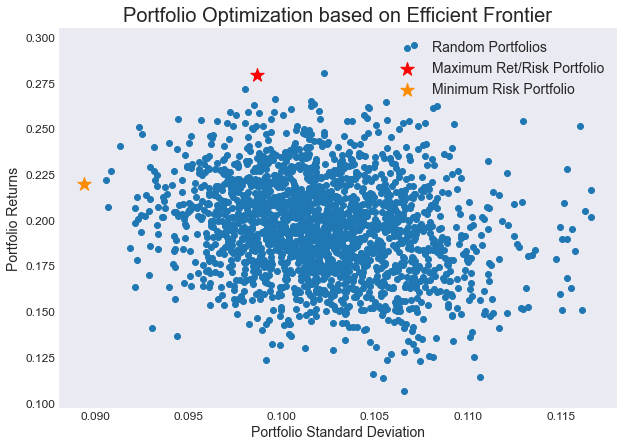

In [293]:
# Highlight the maximum returns/risk portfolio and minimum risk portfolio
plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=200, color='r', label='Maximum Ret/Risk Portfolio')
plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='*', s=200, color='darkorange', label='Minimum Risk Portfolio')
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.show()

In [294]:
# Print the portfolio with the maximum Sharpe ratio
print("The portfolio metrics for the maximum return/std dev. portfolio:")
print(max_ret_by_std_dev)
print("\nThe portfolio weights for each stock in the maximum return/std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_max_ret_by_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the maximum return/std dev. portfolio:
returns            0.279285
std_dev            0.098662
returns/std_dev    2.830714
Name: 375, dtype: float64

The portfolio weights for each stock in the maximum return/std dev. portfolio is as:
AAP 0.35%
AMED 4.23%
AZO 0.33%
BLL 5.47%
BURL 5.6%
CASY 3.81%
CIEN 0.99%
COP 0.97%
CSCO 3.16%
CSX 2.4%
CTLT 4.73%
DECK 2.7%
DG 4.02%
FCN 1.82%
FE 0.6%
FFIV 1.68%
FL 1.26%
GWW 2.21%
HLF 5.11%
HZNP 2.53%
MOH 3.95%
MORN 4.93%
NEE 2.84%
ODFL 4.43%
OLN 5.11%
PWR 2.09%
SSNC 1.14%
TDG 2.95%
THO 0.96%
TSN 4.4%
UAL 0.56%
UGI 4.26%
UNH 3.97%
WWE 4.43%


In [295]:
# Print the portfolio with the minimum risk
print("The portfolio metrics for the minimum std dev. portfolio:")
print(min_std_dev)
print("\nThe portfolio weights for each stock in the minimum std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_min_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the minimum std dev. portfolio:
returns            0.219587
std_dev            0.089388
returns/std_dev    2.456558
Name: 34, dtype: float64

The portfolio weights for each stock in the minimum std dev. portfolio is as:
AAP 2.6%
AMED 2.58%
AZO 0.84%
BLL 4.06%
BURL 3.88%
CASY 5.57%
CIEN 3.36%
COP 4.76%
CSCO 0.73%
CSX 3.92%
CTLT 5.28%
DECK 0.51%
DG 0.59%
FCN 0.19%
FE 6.25%
FFIV 3.56%
FL 2.2%
GWW 0.87%
HLF 1.39%
HZNP 2.25%
MOH 0.84%
MORN 4.92%
NEE 6.29%
ODFL 0.74%
OLN 5.51%
PWR 4.22%
SSNC 4.26%
TDG 1.35%
THO 0.33%
TSN 3.25%
UAL 1.05%
UGI 1.41%
UNH 6.14%
WWE 4.33%


In [296]:
data_pc

,AAP,AMED,AZO,BLL,BURL,CASY,CIEN,COP,CSCO,CSX,...,OLN,PWR,SSNC,TDG,THO,TSN,UAL,UGI,UNH,WWE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008206,0.045155,0.001996,0.015182,0.024770,-0.000925,0.012689,0.009287,-0.005945,0.020618,...,0.031948,0.005729,0.031174,0.006027,0.030752,0.014222,0.004263,0.009376,0.002850,0.037281
2017-01-05,-0.000697,-0.024302,-0.001311,-0.000520,0.002878,-0.008499,-0.017785,-0.002936,0.002326,0.009828,...,-0.014174,-0.006835,0.009405,-0.001270,-0.018152,0.005199,-0.028622,0.004105,0.001667,-0.015328
2017-01-06,-0.013091,-0.021910,0.001149,0.004423,-0.020429,-0.007638,-0.004115,-0.003731,0.001989,0.014328,...,-0.001513,0.000860,-0.004326,0.017400,0.004720,-0.007523,0.006203,0.008821,0.001418,-0.009125
2017-01-09,-0.000589,0.015798,-0.003241,-0.015803,0.001640,0.000941,0.001240,-0.021285,-0.001654,-0.014126,...,0.012883,-0.020344,0.013703,-0.003046,-0.010864,-0.010581,-0.001261,-0.030923,-0.002833,0.016251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.004194,-0.008746,0.005922,0.009035,0.009667,0.008811,0.003238,-0.008043,0.000519,0.002187,...,-0.003744,0.000254,0.000990,-0.008099,-0.003348,-0.006653,-0.000446,0.005130,-0.007623,-0.072796
2017-12-26,0.014023,0.004881,0.006182,-0.009745,0.010324,-0.003872,0.000000,0.013153,-0.001816,-0.002364,...,0.010408,0.002284,-0.007171,0.009089,0.008628,0.013768,0.001487,-0.011485,-0.001818,0.001354
2017-12-27,-0.021479,-0.008780,-0.010469,-0.001064,0.005109,0.005243,-0.006455,-0.011382,0.002079,0.004921,...,0.007725,-0.000506,0.006974,0.002563,-0.006791,-0.003059,-0.003415,0.002151,0.003734,0.023657


In [122]:
import mibian
from tabulate import tabulate
c = mibian.BS([55.26, 57.50, 0, 2], volatility=32)


In [123]:
c.callPrice

0.02578846061142226

In [124]:
c.putPrice

2.265788460611418

In [125]:
stock_price = 55.26
strike_price = 57.50
interest_rate = 0
days_to_expiry = 2
volatility = 32

In [126]:
greeks = mibian.BS([stock_price, strike_price, interest_rate, days_to_expiry], \
                   volatility=volatility)

In [127]:
print(
    tabulate(
        [
            ['Delta',greeks.callDelta],
            ['Gamma',greeks.gamma],
            ['Vega',greeks.vega],
            ['Theta',greeks.callTheta],
            ['Rho',greeks.callRho]
        ],
        headers=['Greeks','Value'],tablefmt='orgtbl'))
print("")
print("The Call price is:",greeks.callPrice)

| Greeks   |        Value |
|----------+--------------|
| Delta    |  0.0478913   |
| Gamma    |  0.0761251   |
| Vega     |  0.00407602  |
| Theta    | -0.0326082   |
| Rho      |  0.000143599 |

The Call price is: 0.02578846061142226


In [128]:
print(
    tabulate(
        [
            ['Delta', greeks.putDelta],
            ['Gamma', greeks.gamma],
            ['Vega', greeks.vega],
            ['Theta', greeks.putTheta],
            ['Rho', greeks.putRho]
        ],
        headers=['Greeks', 'Value'], tablefmt='orgtbl'))
print("")
print("The Put price is:",greeks.putPrice)
print("The Call price is:",greeks.callPrice)

| Greeks   |       Value |
|----------+-------------|
| Delta    | -0.952109   |
| Gamma    |  0.0761251  |
| Vega     |  0.00407602 |
| Theta    | -0.0326082  |
| Rho      | -0.00300709 |

The Put price is: 2.265788460611418
The Call price is: 0.02578846061142226


In [129]:
# Define parameters for call option contract
stock_price = 100
strike_price = 100
interest_rate = 0
days_to_expiry = 40
volatility = 38.09

# Compute greeks
greeks_stock_price_100 = mibian.BS([stock_price, strike_price, interest_rate, days_to_expiry], \
                   volatility=volatility)

# Print Delta and Gamma
print(tabulate(
        [             
            ['Stock Price', 100],
            ['Call Price', greeks_stock_price_100.callPrice],
            ['Delta', greeks_stock_price_100.callDelta],
            ['Gamma', greeks_stock_price_100.gamma]            
        ], 
        tablefmt='orgtbl'))

| Stock Price | 100         |
| Call Price  |   5.02709   |
| Delta       |   0.525135  |
| Gamma       |   0.0315757 |


In [130]:
# Change in stock price is INR 1 from 100 to 101
call_price_at_101 = greeks_stock_price_100.callPrice \
                  + greeks_stock_price_100.callDelta * (101 - 100) \
                  + 0.5 * greeks_stock_price_100.gamma * (101 - 100)**2
print(call_price_at_101)

5.56801680203463


In [131]:
stock_price = 101
actual_call_price_at_101 = mibian.BS([stock_price, strike_price, interest_rate, days_to_expiry], \
                   volatility=volatility).callPrice

print(actual_call_price_at_101)

5.567930205927425


In [132]:
# Define parameters for call option contract
stock_price = 100
strike_price = 100
interest_rate = 0
days_to_expiry = 40
volatility = 30

# Compute greeks
greeks_stock_price_100 = mibian.BS([stock_price, strike_price, interest_rate, days_to_expiry], \
                   volatility=volatility)

# Print Vega
print (tabulate(
        [             
            ['Stock Price', 100],
            ['Call Price', greeks_stock_price_100.callPrice],
            ['Vega', greeks_stock_price_100.vega]                       
        ], 
        tablefmt='orgtbl'))

| Stock Price | 100        |
| Call Price  |   3.96038  |
| Vega        |   0.131904 |


In [133]:
call_price_at_31 = greeks_stock_price_100.callPrice \
                  + greeks_stock_price_100.vega * (0.31 - 0.30) * 100
                  
print(call_price_at_31)

4.092280217433506


In [134]:
volatility = 31
actual_call_price_at_31 = mibian.BS([stock_price, strike_price, interest_rate, days_to_expiry], \
                   volatility=volatility).callPrice

print(actual_call_price_at_31)

4.092274736640356


In [135]:

nifty_nov_fut = 10350.00
nifty_dec_fut = 10387.00

strike_price = 10400
nov_call_price = 50.50
dec_call_price = 148.50
setup_cost = dec_call_price - nov_call_price

# Today's date is 21 November 2017. Therefore, days to November expiry is 7 days and days to December expiry is 34 days.
days_to_expiry_nov_call = 7
days_to_expiry_dec_call = 34

# Range of values for Nifty
sT = np.arange(0.92*nifty_nov_fut,1.1*nifty_nov_fut,1) 

# Interest rate for input to Black-Scholes model
interest_rate = 0.0

In [136]:

nov_call_iv = mibian.BS([nifty_nov_fut, strike_price, interest_rate, days_to_expiry_nov_call], 
                        callPrice=nov_call_price).impliedVolatility
print("Front Month IV %.2f" % nov_call_iv,"%")

# Back-month IV
dec_call_iv = mibian.BS([nifty_dec_fut, strike_price, interest_rate, days_to_expiry_dec_call], 
                        callPrice=dec_call_price).impliedVolatility
print("Back Month IV %.2f" % dec_call_iv,"%")

Front Month IV 12.70 %
Back Month IV 12.25 %


In [137]:

days_to_expiry_nov_call = 0.001
days_to_expiry_dec_call = 29 - days_to_expiry_nov_call

df = pd.DataFrame()
df['nifty_price'] = sT
df['nov_call_price'] = np.nan
df['dec_call_price'] = np.nan

# Calculating call price for different possible values of Nifty
for i in range(0,len(df)):
    df.loc[i,'nov_call_price'] = mibian.BS([df.iloc[i]['nifty_price'], strike_price, interest_rate, days_to_expiry_nov_call], 
                                           volatility=nov_call_iv).callPrice
    
    # Since interest rate is considered 0%, 35 is added to the nifty price to get the Nifty December futures price. 
    df.loc[i,'dec_call_price'] = mibian.BS([df.iloc[i]['nifty_price']+35, strike_price, interest_rate, days_to_expiry_dec_call], 
                                           volatility=dec_call_iv).callPrice
df.head()

,nifty_price,nov_call_price,dec_call_price
0,9522.0,0.0,0.806387
1,9523.0,0.0,0.813929
2,9524.0,0.0,0.821534
3,9525.0,0.0,0.829203
4,9526.0,0.0,0.836937


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import linear_model and dataset from sklearn
from sklearn import linear_model, datasets
iris = datasets.load_iris()   

# Independent variables. We will only use the first two features/Columns.
X = iris.data[:, :2] 

# Dependent variable
Y = iris.target

In [10]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [177]:
log_reg = linear_model.LogisticRegression(C=1e5)
log_reg.fit(X,Y)

LogisticRegression(C=100000.0)

In [179]:
# Step size in the mesh
h = .01 

# Create the decision boundary
# For that, we will assign a color to each Point in the mesh [x_min, x_max] [y_min, y_max]
# Take the endpoints of the X variable
x_min, x_max = X[:, 0].min() - 3.5, X[:, 0].max() + 3.5 
# Take the endpoints of the Y variable
y_min, y_max = X[:, 0].min() - 3.5, X[:, 0].max() + 3.5  

# Create a mesh using np.mesh function so that we can easily see the classified results under different mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [185]:
yy

array([[ 0.8 ,  0.8 ,  0.8 , ...,  0.8 ,  0.8 ,  0.8 ],
       [ 0.81,  0.81,  0.81, ...,  0.81,  0.81,  0.81],
       [ 0.82,  0.82,  0.82, ...,  0.82,  0.82,  0.82],
       ...,
       [11.38, 11.38, 11.38, ..., 11.38, 11.38, 11.38],
       [11.39, 11.39, 11.39, ..., 11.39, 11.39, 11.39],
       [11.4 , 11.4 , 11.4 , ..., 11.4 , 11.4 , 11.4 ]])

In [186]:
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([0, 0, 0, ..., 0, 0, 0])

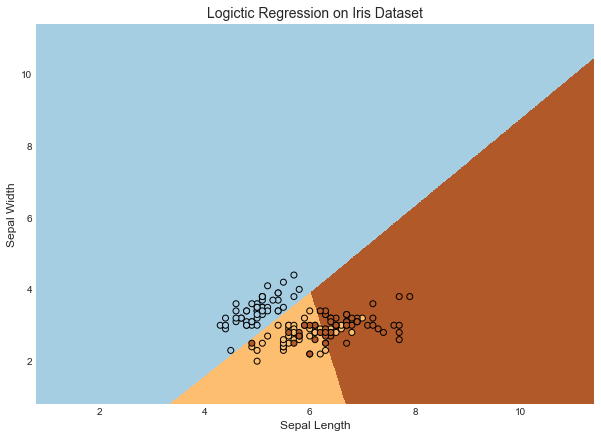

In [187]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.title('Logictic Regression on Iris Dataset', fontsize=14)

plt.show()

In [190]:
# Import numpy
import numpy as np

# Import matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Import KNN and dataset from sklearn
from sklearn import neighbors, datasets

# Import Iris dataset
iris = datasets.load_iris()

In [191]:
# We only take the first two features. 
X = iris.data[:, :2]
y = iris.target

X[:2], y[:2]

(array([[5.1, 3.5],
        [4.9, 3. ]]),
 array([0, 0]))

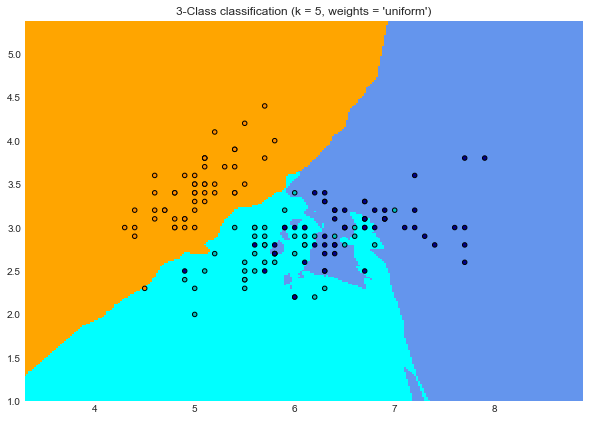

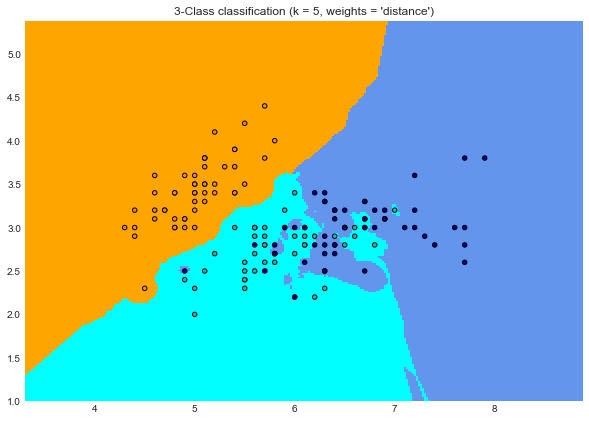

In [196]:
# Number of neighbours
n_neighbors = 5

# Step size in the mesh
h = 0.02

# Create color Maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # We create an instance of Neighbours Classifier and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary
    # For that, we will assign a color to each Point in the mesh [x_min, x_max],[y_min, y_max]
    # Take the endpoints of the X varible
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # Take the endpoints of the Y varible
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh so that we can easily see the classified results under different mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the values using the ravel function 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 7))
    # Plot the mesh grid
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)  

    # Plot the points used to train model
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    # Set the X limits
    plt.xlim(xx.min(), xx.max())
    # Set the y limits
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

In [213]:
# Import numpy
import numpy as np

# Import matplotlib as an alias plt and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Import svm from sklearn
from sklearn import svm

In [214]:
# Create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2)-[2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
X[:3],Y[:3]

(array([[-0.23594765, -1.59984279],
        [-1.02126202,  0.2408932 ],
        [-0.13244201, -2.97727788]]),
 [0, 0, 0])

In [215]:
# Fit the model
clf = svm.SVC(kernel="linear")
clf.fit(X, Y)

SVC(kernel='linear')

In [216]:
# Get the separating hyperplane

# Coefficient of the model
w = clf.coef_[0]  

# Slope of the model
a = -w[0] / w[1]  

# Define the X coordinate
xx = np.linspace(-5, 5) 

# Calculate the Y coordinate
yy = a * xx - (clf.intercept_[0]) / w[1] 

xx,yy

(array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
        -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
        -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
        -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
        -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
         0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
         1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
         2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
         3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
         4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ]),
 array([ 7.32169617,  7.03761852,  6.75354087,  6.46946322,  6.18538558,
         5.90130793,  5.61723028,  5.33315263,  5.04907498,  4.76499733,
         4.48091969,  4.19684204,  3.91276439,  3.62868674,  3.34460909,
         3.06053144,  2.7764538 ,  2.49237615,  2

In [224]:
clf

SVC(kernel='linear')

In [217]:
# Construct the upper plane
b = clf.support_vectors_[0]    
yy_down = a * xx + (b[1] - a * b[0]) 
yy_down

array([ 5.77921879,  5.49514114,  5.2110635 ,  4.92698585,  4.6429082 ,
        4.35883055,  4.0747529 ,  3.79067526,  3.50659761,  3.22251996,
        2.93844231,  2.65436466,  2.37028701,  2.08620937,  1.80213172,
        1.51805407,  1.23397642,  0.94989877,  0.66582113,  0.38174348,
        0.09766583, -0.18641182, -0.47048947, -0.75456712, -1.03864476,
       -1.32272241, -1.60680006, -1.89087771, -2.17495536, -2.45903301,
       -2.74311065, -3.0271883 , -3.31126595, -3.5953436 , -3.87942125,
       -4.16349889, -4.44757654, -4.73165419, -5.01573184, -5.29980949,
       -5.58388714, -5.86796478, -6.15204243, -6.43612008, -6.72019773,
       -7.00427538, -7.28835302, -7.57243067, -7.85650832, -8.14058597])

In [218]:
# Construct the lower plane
b = clf.support_vectors_[-1]  
yy_up = a * xx + (b[1] - a * b[0])
yy_up

array([ 8.86428014,  8.58020249,  8.29612484,  8.0120472 ,  7.72796955,
        7.4438919 ,  7.15981425,  6.8757366 ,  6.59165896,  6.30758131,
        6.02350366,  5.73942601,  5.45534836,  5.17127071,  4.88719307,
        4.60311542,  4.31903777,  4.03496012,  3.75088247,  3.46680482,
        3.18272718,  2.89864953,  2.61457188,  2.33049423,  2.04641658,
        1.76233894,  1.47826129,  1.19418364,  0.91010599,  0.62602834,
        0.34195069,  0.05787305, -0.2262046 , -0.51028225, -0.7943599 ,
       -1.07843755, -1.36251519, -1.64659284, -1.93067049, -2.21474814,
       -2.49882579, -2.78290344, -3.06698108, -3.35105873, -3.63513638,
       -3.91921403, -4.20329168, -4.48736933, -4.77144697, -5.05552462])

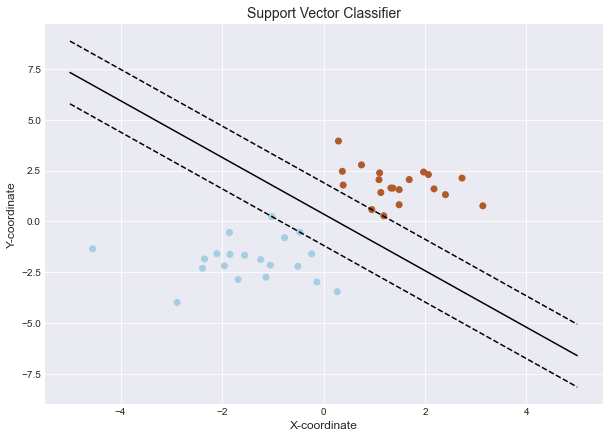

In [219]:
plt.figure(figsize=(10,7))

# Separating hyperplane
plt.plot(xx, yy,'k-')        
# Lower boundary
plt.plot(xx, yy_down, 'k--') 
# Upper boundary
plt.plot(xx, yy_up,'k--')   
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors="none") 
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('Support Vector Classifier', fontsize=14)
plt.xlabel('X-coordinate', fontsize=12)
plt.ylabel('Y-coordinate', fontsize=12)
plt.show()

In [225]:
# For data manipulation
import numpy as np
import pandas as pd
import yfinance as yf
# Import RandomForestClassifier and accuracy_score functions from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [227]:
# The data is stored in the directory 'data'
path = '../data/'

# Read stock data from csv file
data = pd.read_csv('/Users/liliaromanova/Downloads/Introduction-to-Machine-Learning-for-Trading-Resources/data/BAC_2010_2021.csv', index_col=0)
data.index = pd.to_datetime(data.index)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,15.090000,15.240000,15.010000,15.060000,13.114834,94322600
2010-01-04,15.240000,15.750000,15.120000,15.690000,13.663458,180845200
2010-01-05,15.740000,16.209999,15.700000,16.200001,14.107587,209521300
2010-01-06,16.209999,16.540001,16.030001,16.389999,14.273045,205257900
2010-01-07,16.680000,17.190001,16.510000,16.930000,14.743298,320868400


In [228]:
# Create input features
data['Open-Close'] = (data['Open'] - data['Close'])
data['High-Low'] = (data['High'] - data['Low'])

# Drop NaN values
data.dropna(inplace=True)

# Store the features in a variable X
X = data[['Open-Close', 'High-Low']]
X.head(2)

,Open-Close,High-Low
Date,,
2009-12-31,0.03,0.23
2010-01-04,-0.45,0.63


In [229]:
y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)
y

array([ 1,  1,  1, ...,  1, -1, -1])

In [230]:
# Training dataset length
split = int(len(data) * 0.75)

# Splitting the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [231]:
# Create and fit the model on train dataset
clf = RandomForestClassifier(random_state=5)
model = clf.fit(X_train, y_train)

In [232]:
print('Prediction Accuracy (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Prediction Accuracy (%):  51.41242937853108


In [234]:
X = [[0., 0.], [1., 1.]]
y = [0, 1]
X,y

([[0.0, 0.0], [1.0, 1.0]], [0, 1])

In [235]:
# Import MLPClassifier
from sklearn.neural_network import MLPClassifier

# Create the model
clf = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
                    solver='lbfgs')
# Fit the model
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [236]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [243]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [245]:
clf.predict_proba([[2., 2.], [1., 2.]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

In [1]:
!pip install jsonlib-python3

In [6]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import yfinance as yf
# For data manipulation
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
# To plot
import matplotlib.pyplot as plt
import jsonlib
plt.style.use('seaborn-darkgrid')
import requests
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'jsonlib'

In [5]:

f = yf.download('SPY', start="2019-06-05", end="2021-06-05")
#f = pdr.DataReader('SPY', 'yahoo', start="2019-06-05", end="2021-06-05")

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 167, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 179, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/yfinance/base.py", line 157, in history
    data = data.json()
  Fil

KeyboardInterrupt: 

In [5]:
# Read the csv file using read_csv method of pandas
Df = pd.read_csv('/Users/liliaromanova/Downloads/Introduction-to-Machine-Learning-for-Trading-Resources/data/SPY.csv', index_col=0)

# Convert index to datetime format
Df.index = pd.to_datetime(Df.index)

# Print the first five rows 
Df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-28,3234.270020,3243.719971,3216.169922,3218.439941,4027890000
2020-07-29,3227.219971,3264.739990,3227.219971,3258.439941,4676300000
2020-07-30,3231.760010,3250.919922,3204.129883,3246.219971,4254010000
2020-07-31,3270.449951,3272.169922,3220.260010,3271.120117,5117260000
2020-08-03,3288.260010,3302.729980,3284.530029,3294.610107,4643640000


In [6]:
# Create predictor variables
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low

# Store all predictor variables in a variable X
X = Df[['Open-Close', 'High-Low']]
X.head()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,Open-Close,High-Low
Date,,
2018-12-31,-7.910156,26.419922
2019-01-02,-33.070068,52.020020
2019-01-03,44.030029,49.179932
2019-01-04,-57.609863,63.739990
2019-01-07,-14.079834,41.599854


In [7]:
# Target variables
y = np.where(Df['Close'].shift(-1) > Df['Close'], 1, 0)

In [8]:
split_percentage = 0.8
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [9]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [263]:
# train and test accuracy
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 59.69%
Test Accuracy: 54.32%


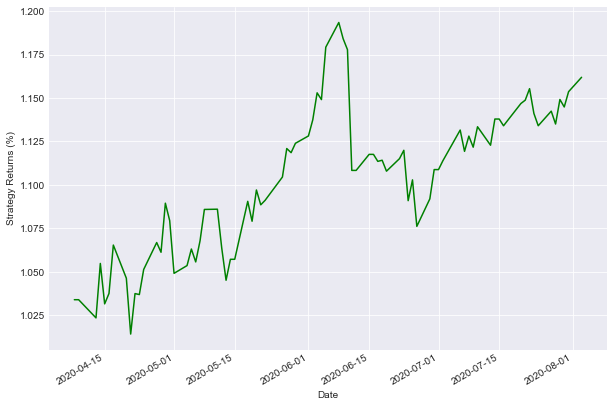

In [264]:
# Predicted Signal
Df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
Df['Return'] = Df.Close.pct_change()

# Calculate strategy returns
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal.shift(1)

# Calculate geometric returns
geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10, 7),color='g')
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()

In [265]:
Df

,Open,High,Low,Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return
Date,,,,,,,,,,
2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,3442870000,-7.910156,26.419922,1,NaN,NaN
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,-33.070068,52.020020,1,0.001268,0.001268
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000,44.030029,49.179932,1,-0.024757,-0.024757
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4213410000,-57.609863,63.739990,0,0.034336,0.034336
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4104710000,-14.079834,41.599854,1,0.007010,0.000000
...,...,...,...,...,...,...,...,...,...,...
2020-07-28,3234.270020,3243.719971,3216.169922,3218.439941,4027890000,15.830078,27.550049,1,-0.006473,-0.006473
2020-07-29,3227.219971,3264.739990,3227.219971,3258.439941,4676300000,-31.219971,37.520020,1,0.012428,0.012428
2020-07-30,3231.760010,3250.919922,3204.129883,3246.219971,4254010000,-14.459961,46.790039,1,-0.003750,-0.003750


In [267]:
Df['Real Signal'] = y

In [268]:
Df

,Open,High,Low,Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Real Signal
Date,,,,,,,,,,,
2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,3442870000,-7.910156,26.419922,1,NaN,NaN,1
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,-33.070068,52.020020,1,0.001268,0.001268,0
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000,44.030029,49.179932,1,-0.024757,-0.024757,1
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4213410000,-57.609863,63.739990,0,0.034336,0.034336,1
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4104710000,-14.079834,41.599854,1,0.007010,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-28,3234.270020,3243.719971,3216.169922,3218.439941,4027890000,15.830078,27.550049,1,-0.006473,-0.006473,1
2020-07-29,3227.219971,3264.739990,3227.219971,3258.439941,4676300000,-31.219971,37.520020,1,0.012428,0.012428,0
2020-07-30,3231.760010,3250.919922,3204.129883,3246.219971,4254010000,-14.459961,46.790039,1,-0.003750,-0.003750,1


In [270]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
import numpy as np
np.set_printoptions(precision=2)

# Load the dataset
iris = load_iris()
X_iris = X
y_iris = y

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Choose techniques for the inner and outer loop of nested cross-validation
inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=1)

# Perform nested cross-validation
clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, iid=False)
clf.fit(X_iris, y_iris)
best_estimator = clf.best_estimator_

cv_dic = cross_validate(clf, X_iris, y_iris, cv=outer_cv, scoring=['accuracy'], return_estimator=False, return_train_score=True)
mean_val_score = cv_dic['test_accuracy'].mean()

print('nested_train_scores: ', cv_dic['train_accuracy'])
print('nested_val_scores:   ', cv_dic['test_accuracy'])
print('mean score:            {0:.2f}'.format(mean_val_score))

nested_train_scores:  [0.9  0.69 0.68 0.66]
nested_val_scores:    [0.53 0.54 0.52 0.57]
mean score:            0.54


In [277]:
import pandas as pd
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.svm import SVC


X = X
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

kfold = KFold(n_splits=10, random_state='seed')

svm = SVC(kernel='poly')
results = cross_val_score(svm, X_train, y_train, cv=kfold) #Cross validation on training set

In [278]:
results.mean()

0.5705128205128205